### Please complete the following sections sequentially to complete this assignment.

##### <span style="color:red">Note: You can create as many code or markdown cells as you deem necessary to answer each question. However, please leave the problems unchanged. We will evaluate your solutions by executing your code sequentially.</span> 

---
**For this assignment, we will use the following dataset that summarizes the usage behavior of about 9000 active credit cardholders during a six-month period. The dataset contains 18 behavioral variables.**

**<span style="color:red">The objective of this assignment is to cluster the cardholders based on their credit card data. </span> The assignment's dataset is included in the homework's zipped folder. The table below has the description of each variable in the dataset.**

| Variable                       | Description                                                                                                                 |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| CUSTID                         | Identification of Credit Card holder (Categorical)                                                                          |
| BALANCE                        | Balance amount left in their account to make purchases                                                                      |
| BALANCEFREQUENCY               | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)           |
| PURCHASES                      | Amount of purchases made from account                                                                                       |
| ONEOFFPURCHASES                | Maximum purchase amount done in one-go                                                                                      |
| INSTALLMENTSPURCHASES          | Amount of purchase done in installment                                                                                      |
| CASHADVANCE                    | Cash in advance given by the user                                                                                           |
| PURCHASESFREQUENCY             | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY       | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)                   |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)                      |
| CASHADVANCEFREQUENCY           | How frequently the cash in advance being paid                                                                               |
| CASHADVANCETRX                 | Number of Transactions made with "Cash in Advanced"                                                                         |
| PURCHASESTRX                   | Numbe of purchase transactions made                                                                                         |
| CREDITLIMIT                    | Limit of Credit Card for user                                                                                               |
| PAYMENTS                       | Amount of Payment done by user                                                                                              |
| MINIMUM_PAYMENTS               | Minimum amount of payments made by user                                                                                     |
| PRCFULLPAYMENT                 | Percent of full payment paid by user                                                                                        |
| TENURE                         | Tenure of credit card service for user                                                                                      |

---
### Introduction to K-Means Clustering

**1- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=e9cb53bb-3143-45d7-9e15-acef0033d79c) for an intorudction to K-Means clustering and answer the following questions.**

**2- Briefly describe the overall process of K-means clustering (15 pts)**

######  k-means clustering enables us to cluster the data into several groups by detecting the distinct categories of groups in the unlabelled datasets by itself, even without the necessity of training of data. As an input, the algorithm consumes an unlabelled dataset, splits the complete dataset into k-number of clusters, and iterates the process to meet the right clusters, and the value of k should be predetermined. 

**3- What are the advantages and disadvantages of the K-means algorithm? (5 pts)**

###### Advantages: It is very smooth in terms of interpretation and resolution. For a large number of variables present in the dataset, K-means operates quicker than Hierarchical clustering. While redetermining the cluster centre, an instance can modify the cluster.
###### Disadvantages: Sometimes, it is quite tough to forecast the number of clusters, or the value of k. The output is highly influenced by original input, for example, the number of clusters. An array of data substantially hits the concluding outcomes.

---
### K-Means Clustering in Python

**4- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c207374a-3d9d-47f0-a15c-acf400030817) to learn about K-means clustering in Python. The video's dataset is included in the assignment zipped folder, in case you want to replicate the codes.**

**5- Read the assignment's dataset into Python and import all necessary packages. (5 pts)**

In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('credit_card_clustering.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**6- Delete any observation that has at least one missing value. (5 pts)**

In [11]:
df.dropna(axis=0, inplace=True)

**7- Standardize the data. Make sure that ```CUST_ID``` is not used as it is just the row number. (10 pts)**

In [12]:
X = df[[ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

scaler = StandardScaler()
scaler.fit(X)
standardized = scaler.transform(X)
standardized

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

**8- Normalize the data. Make sure that ```CUST_ID``` is not used as it is just the row number. (10 pts)**

In [13]:
X = df[[ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

scaler = MinMaxScaler()
scaler.fit(X)
normalized = scaler.transform(X)
normalized

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

**9- Cluster the NORMALIZED data using K-means clustering and form 5 clusters. Then calculate the silhouette score for your clustering solution. (5 pts)**

In [19]:
clm = KMeans(n_clusters=5).fit(normalized)
silhouette_score(normalized, clm.labels_)

0.31583134321353984

**10- What does the silhouette score indicate about the quality of the clustering solution? (10 pts)**

##### The score shows it is near being on the border of two clusters meaning that 5 clusters is not correct

**11- Determine the number of clusters using the silhouette score and visualize the results? Try 2 to 10 clusters to find the best one. Note: this might take some time to finish executing. Please be patient. (15 pts)**

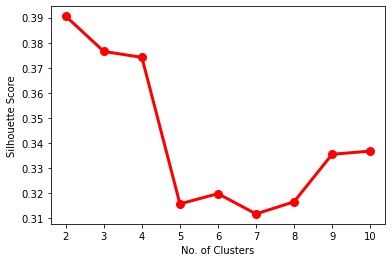

In [6]:
n_clusts = list(range(2,11))
sils = []
for n in n_clusts:
    clm = KMeans(n_clusters=n).fit(normalized)
    sils.append(silhouette_score(normalized, clm.labels_))
    
fig, ax = plt.subplots()
ax.plot(n_clusts, sils, color='red', marker='o', markersize=8, linewidth=3)
ax.set(xlabel='No. of Clusters', ylabel='Silhouette Score')
plt.show()

**12- Cluster the data using K-means clustering and the number of clusters you obtained in previous steps. Calculate the silhouette score for your clustering solution. (5 pts)**

In [20]:
clm = KMeans(n_clusters=2).fit(normalized)
silhouette_score(normalized, clm.labels_)

0.3905501972265014

**13- Use a pairplot to visualize ```PURCHASES_FREQUENCY```, ```CASH_ADVANCE_FREQUENCY```, and ```PRC_FULL_PAYMENT``` with clusters that you created using hierarchical clustering.  (10 pts)**

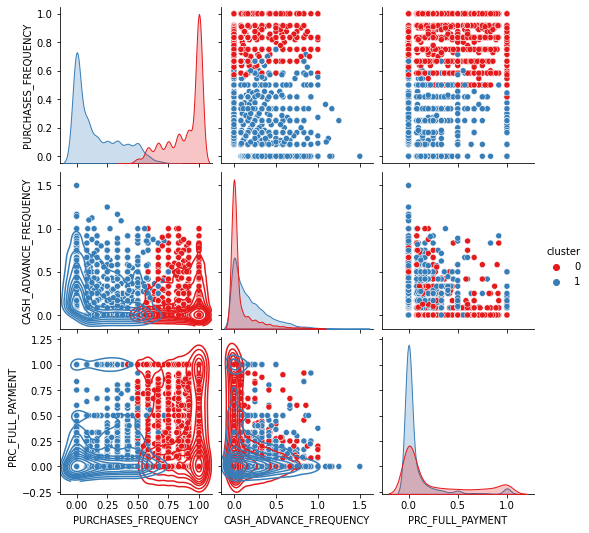

In [21]:
df['cluster'] = clm.labels_
g = sns.pairplot(df[['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT','cluster']], hue='cluster', diag_kind='kde',
palette='Set1')
g.map_lower(sns.kdeplot, color=".2")
plt.show()

**14- What does the result of clustering cardholders reveal about their behavior? (5 pts)**

##### It shows that cardholders with higher purchasing frequency also have a higher full payment percentages than those with lower purchase frequencies. The red group has the better full payment, low cash advance frequency, and high purchase frequency allowing them to be more financially stable.

**15- Obtain the denormalized centers of clusters for your clustering solution. (10 pts)**

In [18]:
scaler.inverse_transform(clm.cluster_centers_)

array([[1.75489649e+03, 8.52640264e-01, 3.27943623e+02, 2.60490725e+02,
        6.77011052e+01, 1.34782945e+03, 1.61691750e-01, 9.44857830e-02,
        6.59632833e-02, 1.87650378e-01, 4.44463409e+00, 3.19458076e+00,
        4.14436908e+03, 1.51961972e+03, 8.49504903e+02, 7.43815554e-02,
        1.14774909e+01],
       [1.41883472e+03, 9.45352825e-01, 1.85327303e+03, 1.01367657e+03,
        8.39982190e+02, 5.74429780e+02, 8.92784697e-01, 3.38154728e-01,
        7.28276170e-01, 7.82052641e-02, 1.97189162e+00, 2.90843251e+01,
        4.97040270e+03, 2.09883394e+03, 8.81870855e+02, 2.60096165e-01,
        1.16019245e+01]])

**16- To which cluster the following cardholder belong? How do you describe the cardholder's behavior based on the cluster she belongs to? (15 pts)**

```[17351.08, 0.02, 19369.23, 19276.83,  6228.49, 36954.55, 0.55, 0.65, 0.15, 0.48, 80.76, 163.81, 3001.53, 27195.11, 33589.68, 0.77, 7.4 ]```

In [22]:
example = np.array([[17351.08, 0.02, 19369.23, 19276.83,  6228.49, 36954.55, 0.55, 0.65, 0.15, 0.48, 80.76, 163.81, 
3001.53, 27195.11, 33589.68, 0.77, 7.4 ]])
example_normalized= scaler.transform(example)
clm.predict(example_normalized)

array([1])

---
### Bonus Question

**17- Execute the following code to create and visualize a random clustering problem with variables X1 and X2, and two intertwined clusters. Then, explain why the K-means algorithm cannot find the right cluster structures in this example. Note: No coding is needed for this question. (30 pts)**

```python
from sklearn.datasets import make_moons
moons = make_moons(1000, noise=0.1)
rand_clusts = pd.DataFrame(moons[0], columns=['X1', 'X2'])
rand_clusts['cluster'] = moons[1]
sns.scatterplot(data=rand_clusts, x='X1', y='X2', hue='cluster')
plt.show()
```